In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Helper functions

In [2]:
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):       #Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

**MODEL CREATION**

In [3]:
class KneighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

Example: Iris dataset, from UCI Machine Learning Repository

In [4]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

Spliting data into train & test sets

In [5]:
X__train, X__test, y__train, y__test = train_test_split(X, y, test_size=0.2)


Preprocessing data

In [6]:
ss = StandardScaler().fit(X__train)
X_train, X_test = ss.transform(X__train), ss.transform(X__test)


Testing knn model across varying ks

In [7]:

accuracies = []
ks = range(1, 30)
for t in ks:
    knn = KneighborsClassifier(t)
    knn.fit(X__train, y__train)
    accuracy = knn.evaluate(X__test, y__test)
    accuracies.append(accuracy)


Visualization: accuracy vs k

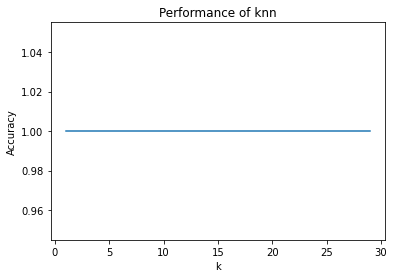

In [8]:

fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()



#Sentiment Analysis using KNN Algorithm
**Dataset: E-commerce Reviews**

In [9]:
train = pd.read_csv(r'train.csv', header=None)
test = pd.read_csv(r'test.csv', header=None)

headerList = ['Sentiment', 'Text'] # adding header
  
train.to_csv("new_train.csv", header=headerList, index=False)
test.to_csv("new_test.csv",header=['Text'],index=False)

train = pd.read_csv(r'new_train.csv')
test = pd.read_csv(r'new_test.csv')

In [10]:

train.columns

Index(['Sentiment', 'Text'], dtype='object')

In [11]:

train.head()

Sentiment                                               Text
0         -1  Eat at Fioris, they said.  Youll like it, they...
1         -1  I just don't understand the appeal.  I've trie...
2          1  This is my go to place for a really good beef ...
3         -1  Not impressed. When I ordered the Oyako bowl, ...
4         -1  This is the first time ever I wrote a bad revi...

In [12]:
train.shape

(1000, 2)

In [13]:
test.shape

(1000, 1)

\
Number of positive and negative sentiments

In [14]:

train['Sentiment'].value_counts()

-1    522
 1    478
Name: Sentiment, dtype: int64

\\

GRAPH: Class frequencies of the dataset

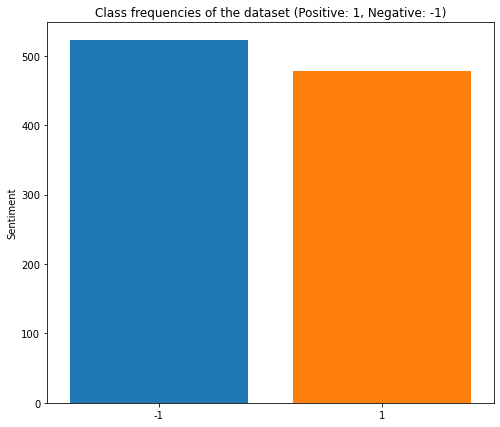

In [15]:
import seaborn as sns
plt.figure(figsize = [8, 7], clear = True, facecolor = 'white')

sns.barplot(x = train['Sentiment'].value_counts().index,
            y = train['Sentiment'].value_counts(),
            saturation = 1).set(title = "Class frequencies of the dataset (Positive: 1, Negative: -1)");

\\

**Text Preprocessing**

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import re, string, unicodedata
from string import punctuation
from nltk.corpus import stopwords


In [18]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

In [19]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text) #removing urls
    text = text.lower()
    text = text.replace('x', '')
    return text
train['Text'] = train['Text'].apply(cleanText)

C:\Users\Ayush\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [20]:
train['Text'] = train['Text'].str.replace('[^\w\s]','') #removing punctuation marks
train['Text'] = train['Text'].str.replace('\d','') #removing numbers
train['Text'] = train['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #stopwords removed

C:\Users\Ayush\AppData\Local\Temp\ipykernel_4856\3810741087.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Text'] = train['Text'].str.replace('[^\w\s]','') #removing punctuation marks
C:\Users\Ayush\AppData\Local\Temp\ipykernel_4856\3810741087.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['Text'] = train['Text'].str.replace('\d','') #removing numbers


In [21]:
train.head()

Sentiment                                               Text
0         -1  eat fioris said youll like saidnnis convenient...
1         -1  dont understand appeal ive tried place twice t...
2          1  go place really good beef enchilada red sauce ...
3         -1  impressed ordered oyako bowl conversation went...
4         -1  first time ever wrote bad review frustrated he...

\\

Common words in Training Dataset (Size based on Frequency)


In [22]:
text = " ".join(i for i in train.Text)
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [13, 6])
plt.imshow(wc)
plt.axis("off")
plt.show



ModuleNotFoundError: No module named 'wordcloud'

\\

**Splitting Data**

In [ ]:
X=train['Text']
Y=train['Sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [ ]:

X_train.shape, y_train.shape, X_test.shape

\\

Vectorization of Text **Data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

\\

**Performing KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20,)


In [ ]:
knn.fit(Xv_train,y_train)

\\

***Testing Model***

In [ ]:
result=[]
X_test = X_test.apply(cleanText)
x_test = vectorization.transform(X_test)
result= knn.predict(x_test)

In [ ]:
result.shape

In [ ]:
result[:100]

**ACCURACY AND SCORE**

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

In [ ]:
knn.score(Xv_test,y_test)

\

**Predicting Sentiment for Test Dataset**

In [ ]:
test['Text'] = test['Text'].apply(cleanText)
test['Text'] = test['Text'].str.replace('[^\w\s]','') 
test['Text'] = test['Text'].str.replace('\d','') 
test['Text'] = test['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) 
t = test['Text']
x = vectorization.transform(t)

In [ ]:
result= knn.predict(x)

In [ ]:
result.shape

In [ ]:
result[:100]

In [ ]:
test['sentiment'] = result

In [ ]:
test.head()

\\

**Prediction saved in csv file**

In [ ]:
test.to_csv("Predicted_test.csv",index=False)

In [ ]:
import plotly.express as px
fig = px.pie(data_frame = test, names = "sentiment", hole = 0.4, title = "Frequency of Positive and Negative reviews in Test dataset",
             width = 700, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 18), uniformtext_minsize = 25)

fig.show()